In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',') #загрузка из файла (локально)
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [52]:
data.shape, data.columns #вывод размеров, и названия колонок

((41, 5),
 Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object'))

In [53]:
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


(   user_id   age country  purchases  revenue
 0        1  25.0      FR          7      749
 1        2  24.0      RU          5     1115
 2        3  52.0      FR          7      399
 3        4  31.0      RU          6      654
 4        5   NaN      DE          6     1296,
 None,
          user_id         age  purchases      revenue
 count  41.000000   39.000000  41.000000    41.000000
 mean   20.243902   36.512821   4.829268   820.048780
 std    11.659289   18.304259   2.710189   613.127269
 min     1.000000    5.000000  -1.000000     0.000000
 25%    10.000000   24.000000   3.000000   432.000000
 50%    20.000000   33.000000   5.000000   693.000000
 75%    30.000000   45.500000   7.000000  1115.000000
 max    40.000000  120.000000  11.000000  2475.000000)

In [54]:
group = data.groupby('age')
data.count() #видно, что не у всех user_id есть age

user_id      41
age          39
country      41
purchases    41
revenue      41
dtype: int64

In [22]:
missings = data.isna().mean()*100
missings.round(2) #4% процента только в столбце age, во всех остальных ни одного пропуска

user_id      0.00
age          4.88
country      0.00
purchases    0.00
revenue      0.00
dtype: float64

In [ ]:
duplicates = data[data.duplicated(keep=False)]
duplicates, len(duplicates) # 2 строчки повторяются

(    user_id   age country  purchases  revenue
 9        10  24.0      RU          7      511
 40       10  24.0      RU          7      511,
 2)

In [6]:
negative_purchases = data[data['purchases'] < 0] #отрицательные значения покупок
unreal_age = data[(data['age']>=100)] #нереальные значения возраста 
zero_revenue_with_notzero_purchases = data[(data['revenue']==0)&(data['purchases']!=0)] #нулевой доход при не нулевом количестве покупок
notzero_revenue_with_zero_purchases = data[(data['revenue']>0)&(data['purchases']==0)] #ненулевой дохо при нулевых покупках (очень сомнительный критерий, но пусть будет))
missing_age = data[data['age'].isna()] #вывод пропусков в столбце age
negative_purchases, unreal_age, zero_revenue_with_notzero_purchases, notzero_revenue_with_zero_purchases, missing_age

(   user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785,
    user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785,
     user_id   age country  purchases  revenue
 10       11  24.0      US          4        0,
 Empty DataFrame
 Columns: [user_id, age, country, purchases, revenue]
 Index: [],
     user_id  age country  purchases  revenue
 4         5  NaN      DE          6     1296
 12       13  NaN      US          9      630)

# Проблемы в данных:
### 2 пропуска в столбце *age* 
### В таблице присутствует значение *age = 120*, это нереальные данные
### Есть покупки в то время как *доход равен нулю*

In [7]:
# Удаление проблем из данных 
data = data.drop_duplicates()
data = data[data['purchases']>=0]
data = data[(data['age']>0) | (data['age']<=100)]
data = data[~((data['revenue']==0)&(data['purchases']>0))]
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652
13,14,36.0,DE,9,2358


In [8]:
#EDA
country_counts = data['country'].value_counts() #статистика по странам
country_counts_all = data['country'].nunique() #сколько всего стран
country_stats = data.groupby('country').agg(
    {
        'user_id': 'count', #количество людей по стране
        'age': ['mean', 'std'], #медиана возраста, стандартное отклонение
        'purchases': ['mean', 'sum'], #медиана покупок, сумма
        'revenue': ['mean', 'sum'] #медиана выручки, сумма
    }
).round(2) #статистика по странам

age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = data['age_group'].value_counts().sort_index()

detailed_stats = data.groupby(['country', 'age_group']).agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)

correlation = data['purchases'].corr(data['revenue']) #корреляция между покупкой и выручкой

country_counts , country_counts_all, country_stats, detailed_stats, correlation

#Среди стран лидирует Россия (RU) с наибольшим количеством пользователей, затем следуют Франция (FR) и США (US). По возрастным группам наиболее представлена категория 26-35 лет, что соответствует основной активной аудитории.

C:\Users\giver\AppData\Local\Temp\ipykernel_42648\203472740.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_stats = data.groupby(['country', 'age_group']).agg({


(country
 RU    12
 FR    11
 US     6
 DE     5
 CN     2
 Name: count, dtype: int64,
 5,
         user_id    age        purchases      revenue      
           count   mean    std      mean sum     mean   sum
 country                                                   
 CN            2  24.00   5.66      4.50   9  1054.00  2108
 DE            5  34.60  12.12      6.60  33  1475.40  7377
 FR           11  39.55  12.40      4.73  52   666.00  7326
 RU           12  30.58  13.37      4.58  55   813.33  9760
 US            6  38.83   9.39      4.00  24   638.17  3829,
                    user_id  purchases  revenue
 country age_group                             
 CN      18-25            1       7.00  1652.00
         26-35            1       2.00   456.00
         36-45            0        NaN      NaN
         46-55            0        NaN      NaN
         55+              0        NaN      NaN
 DE      18-25            1       4.00  1104.00
         26-35            1      11.00  2475

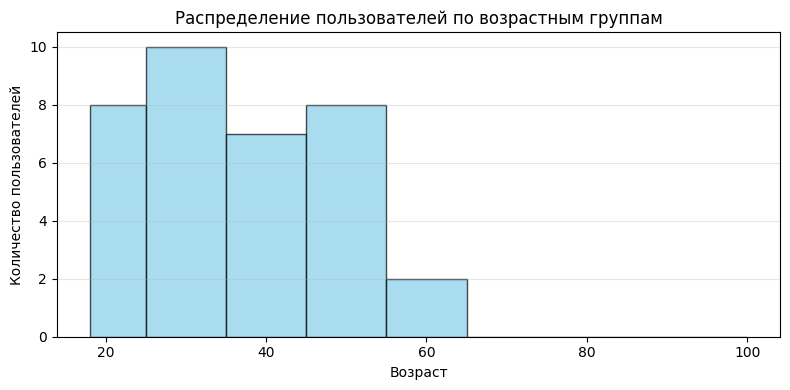

C:\Users\giver\AppData\Local\Temp\ipykernel_42648\2357560125.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_sorted[data_sorted['country'] == country]['revenue'] for country in country_ordered], labels=country_ordered)


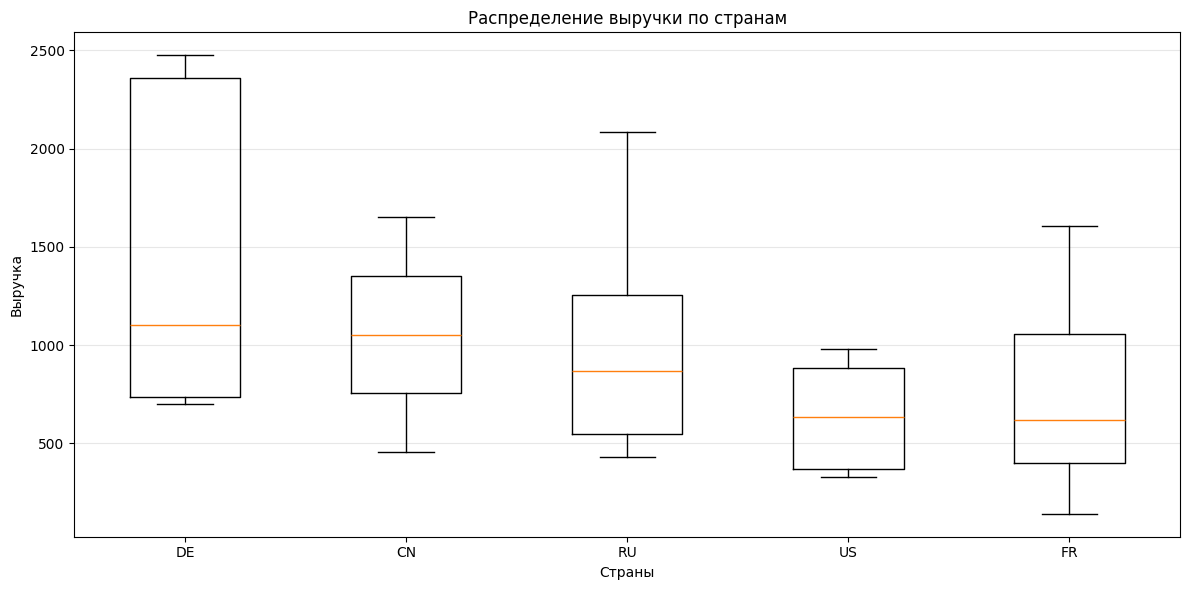

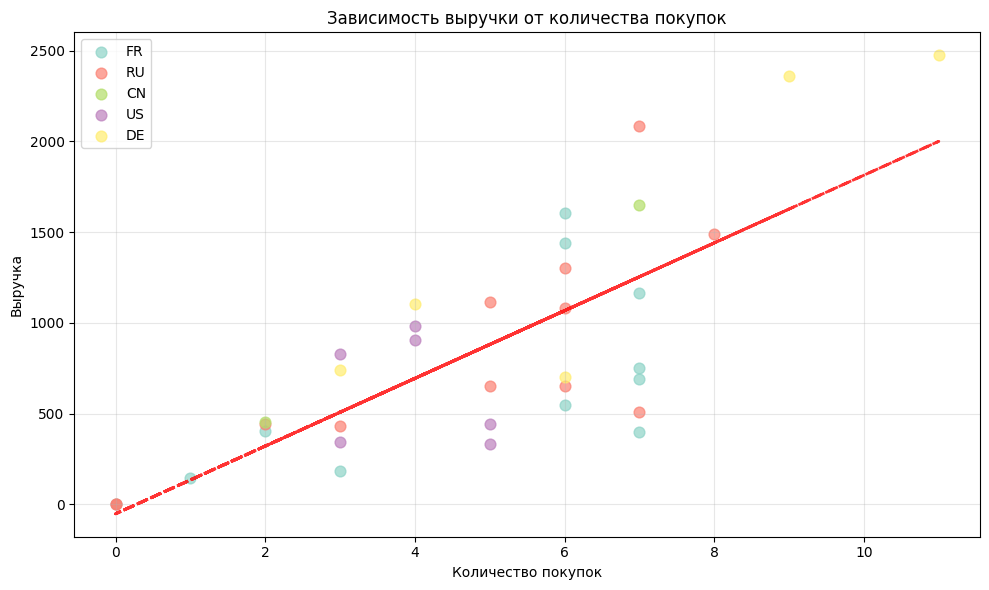

In [ ]:
#Графики 
import matplotlib.pyplot as plt

# Гистограмма

plt.figure(figsize=(8, 4))
bins = [18, 25, 35, 45, 55, 65, 100]

plt.hist(data['age'].dropna(), bins=bins, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрастным группам')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/age', dpi = 300)
plt.show()

# Боксплот

plt.figure(figsize=(12, 6))
data_boxplot = data[data['revenue']>0]
country_ordered = data_boxplot.groupby('country')['revenue'].median().sort_values(ascending=False).index
data_sorted = data_boxplot.set_index('country').loc[country_ordered].reset_index()

plt.boxplot([data_sorted[data_sorted['country'] == country]['revenue'] for country in country_ordered], labels=country_ordered)
plt.xlabel('Страны')
plt.ylabel('Выручка')
plt.title('Распределение выручки по странам')
plt.grid(axis='y', alpha = 0.3)
plt.tight_layout()
plt.savefig('figures/revenue_country', dpi = 300)
plt.show()

# scatter plot

plt.figure(figsize=(10, 6))

countries = data['country'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))
for i, country in enumerate(countries):
    country_data = data[data['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
               c=[colors[i]], label=country, alpha=0.7, s=60)

plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от количества покупок')
plt.legend(title='Страна')
plt.grid(alpha=0.3)

z = np.polyfit(data['purchases'], data['revenue'], 1)
p = np.poly1d(z)
plt.plot(data['purchases'], p(data['purchases']), "r--", alpha=0.8, linewidth=2)

plt.legend()
plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue.png', dpi=300)
plt.show()
